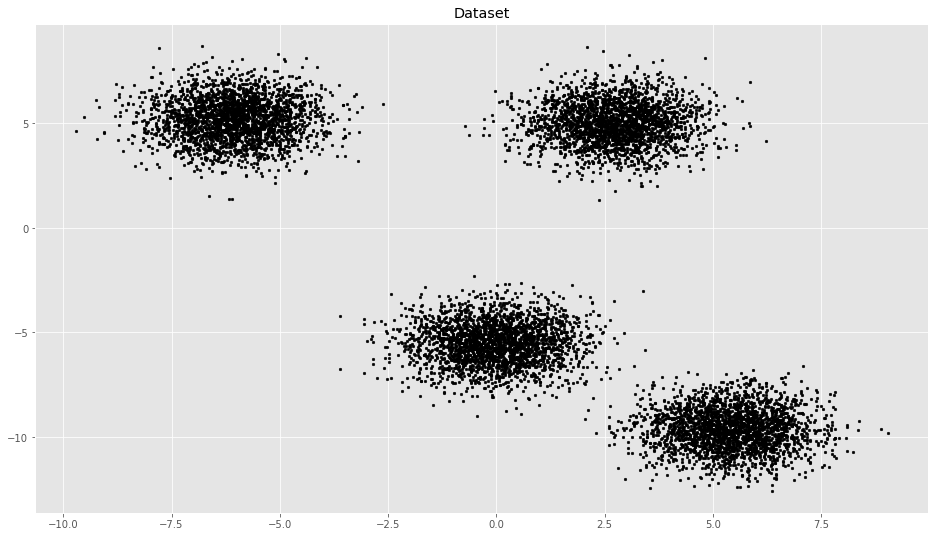

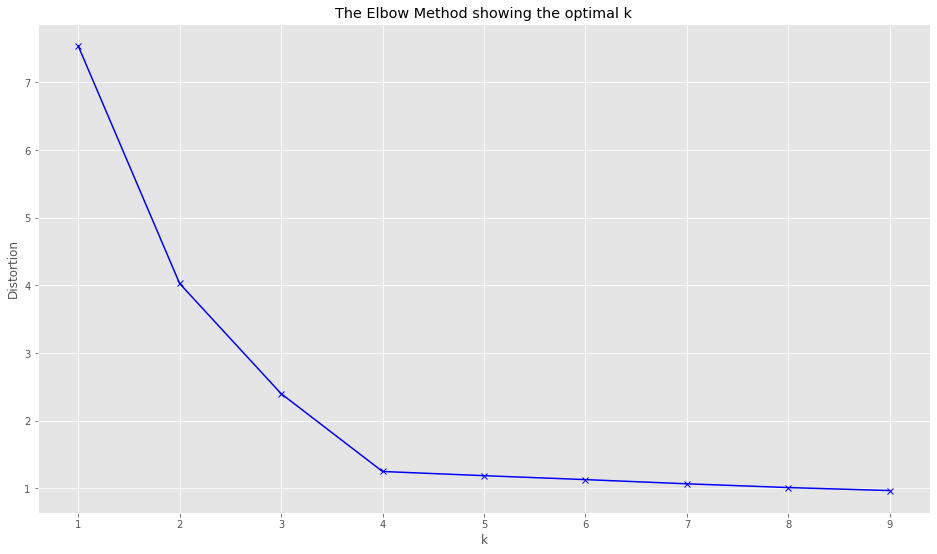

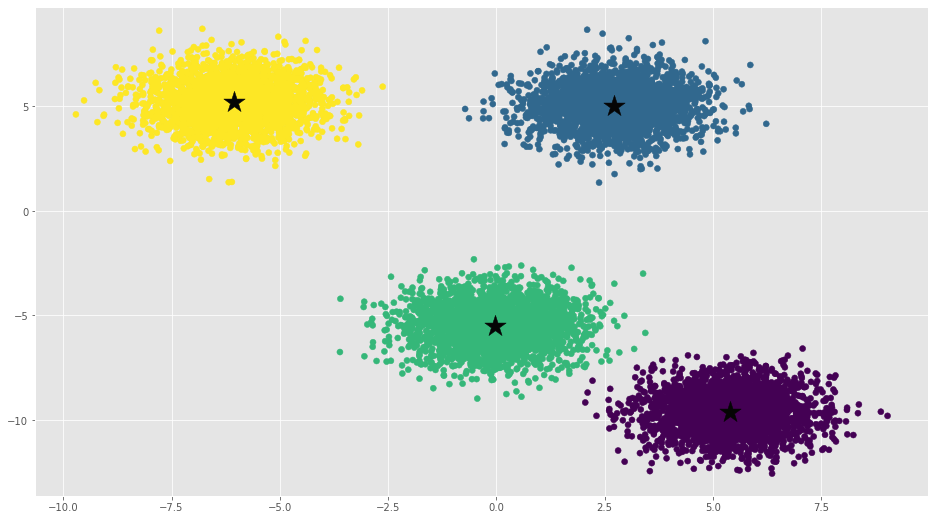

In [1]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

optimal_k = 4
n_samples = 10000
# https://mubaris.com/2017/10/01/kmeans-clustering-in-python/
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
data, y = make_blobs(n_samples=n_samples,
                     n_features=2,
                     centers=optimal_k,
                     random_state=10)

# Getting the values and plotting it
x1 = data[:, 0]
x2 = data[:, 1]
X = np.array(list(zip(x1, x2)))
plt.title('Dataset')
plt.scatter(x1, x2, c='black', s=7)
plt.show()

# https://pythonprogramminglanguage.com/kmeans-elbow-method/
# create new plot
plt.plot()
X = np.array(list(zip(x1, x2))).reshape(len(x1), 2)
colors = ['b', 'g', 'r']
markers = ['o', 'v', 's']

# determine k
distortions = []
range_n_clusters = range(1, 10)
for k in range_n_clusters:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(
            cdist(X, kmeanModel.cluster_centers_, 'euclidean'),
            axis=1)) / X.shape[0])

# Plot the elbow
plt.plot(range_n_clusters, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

# https://mubaris.com/2017/10/01/kmeans-clustering-in-python/
# Step 1 - Pick K random points as cluster centers called centroids.
# Step 2 - Assign each xi to nearest cluster by calculating its distance to each centroid.
# Step 3 - Find new cluster center by taking the average of the assigned points.
# Step 4 - Repeat Step 2 and 3 until none of the cluster assignments change.

# Initializing KMeans
kmeans = KMeans(n_clusters=optimal_k, random_state=10)
# Fitting with inputs
kmeans = kmeans.fit(X)
# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_

fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1], c=y)
ax.scatter(C[:, 0], C[:, 1], marker='*', c='#050505', s=500)
plt.show()
